🔍 Business Problem



Goal: Help a car manufacturer optimize pricing and product development decisions to maximize profitability while meeting consumer demand.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_excel("Dataset.xlsx")

In [41]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Avg MPG,Fuel Type Group,Cluster
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,22.5,Premium,3
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,23.5,Premium,3
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,24.0,Premium,3
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,23.0,Premium,3
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,23.0,Premium,3
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200,23.0,Premium,3
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100,21.5,Premium,3
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300,24.0,Premium,3
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900,23.0,Premium,3
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200,22.5,Premium,3


In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

We can see the value is in the float type and have nan on 6th line and we will see the porpotion of the missing values. And as we can see missing values % is less, so we can do replace nan.

🧹 STEP 2: Data Cleaning
A. Handle Missing Values

In [17]:
nan_count = df['Engine HP'].isna().sum() 
non_nan_count = df['Engine HP'].count()
print(f"Number of NaN values: {nan_count}")
print(f"Number of non-NaN values: {non_nan_count}")

Number of NaN values: 0
Number of non-NaN values: 11914


We will fix the missing value columns "Engine HP" and "Engine Cylinder"

To do that we will replace the nan values by the  median of the remaining values.

In the case of the doors, we will use mode as 4 so we know moistly cars have 4 doors. In the case of the Market Category we will remove that column cause it has High number of missing values

In [28]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)

df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)

df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

df.drop(columns=['Market Category'], inplace=True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_3652\902087817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_3652\902087817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Now we will check that if our methog has work

In [29]:
df['Engine HP'].unique()

array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  115.,  140.,  155.,  114.,
        100.,  241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,
        161.,  292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,
        425.,  350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,
        597.,  237.,  270.,  445.,  443.,  302.,  322.,  315.,  227.,
        101.,  135.,  485.,  238.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  157.,  402.,  389.,  110.,  532.,  170.,  165.,
        125.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,  168.,
        190.,  205.,  200.,  173.,  220.,  210.,  280.,  207.,  265.,
        260.,  290.,  285.,  390.,  225.,  185.,  150.,  430.,  520.,
        560.,  475.,  500.,  540.,  370.,  580.,  420.,  345.,  195.,
        193.,  208.,  181.,  236.,  186.,  252.,  310.,  333.,  340.,
        450.,  281.,  288.,  138.,  137.,  106.,  271.,  196.,  212.,
        278.,  189.,

In [30]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

🧠 STEP 3: Feature Engineering

A. "Fuel Efficiency"

We create new, meaningful variables like average MPG and grouped fuel types to enrich the dataset. This helps simplify complex categories and extract patterns that better explain pricing and consumer behavior. These engineered features improve the performance and interpretability of models used in later analysis.

In [31]:
df['Avg MPG'] = (df['city mpg'] + df['highway MPG']) / 2


B. Fuel Type Grouping

In [32]:
df['Fuel Type Group'] = df['Engine Fuel Type'].apply(
    lambda x: 'Alternative' if isinstance(x, str) and ('electric' in x.lower() or 'natural gas' in x.lower()) else
              'Flex-Fuel' if isinstance(x, str) and 'flex' in x.lower() else
              'Premium' if isinstance(x, str) and 'premium' in x.lower() else
              'Regular' if isinstance(x, str) and 'regular' in x.lower() else
              'Diesel' if isinstance(x, str) and 'diesel' in x.lower() else 
              'Other' 
)

📊 STEP 4: Exploratory Data Analysis (EDA)


A. Distribution of Fuel Types

 We explore how features like fuel type, vehicle style, and MSRP are distributed to uncover trends in consumer preferences. Visualizations such as bar plots and box plots help identify which categories are most common and how pricing varies across them. This insight guides decisions on what product features to prioritize and how to position them in the market.

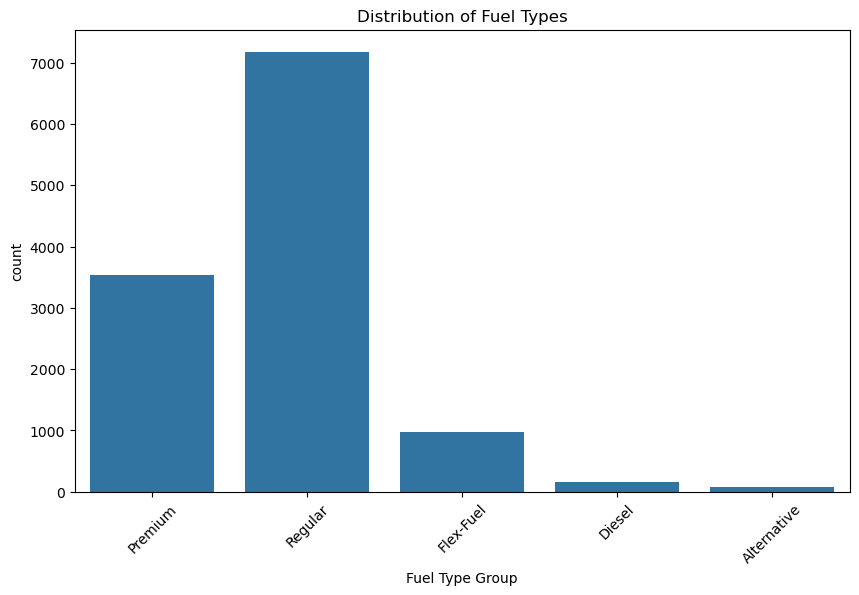

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Fuel Type Group', data=df)
plt.title('Distribution of Fuel Types')
plt.xticks(rotation=45)
plt.show()


B. MSRP by Vehicle Style

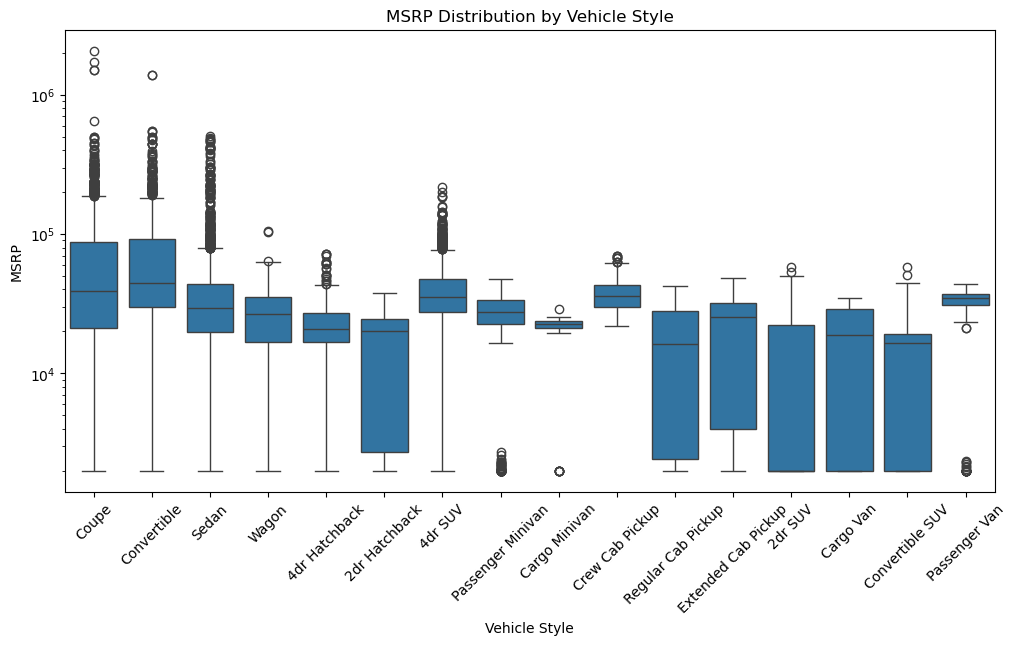

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Vehicle Style', y='MSRP', data=df)
plt.yscale('log')  # log scale due to skewed pricing
plt.xticks(rotation=45)
plt.title('MSRP Distribution by Vehicle Style')
plt.show()


🎯 STEP 5: Regression Analysis to Predict MSRP


A. Encoding Categorical Features

We use pd.get_dummies() to convert categorical features like 'Vehicle Style' and 'Fuel Type Group' into numerical format for regression modeling. This allows machine learning algorithms to interpret these variables correctly without assuming any ordinal relationship.

In [35]:
df_encoded = pd.get_dummies(df[['Engine HP', 'Engine Cylinders', 'Avg MPG', 'Vehicle Style', 'Fuel Type Group']], drop_first=True)

df_encoded['MSRP'] = df['MSRP']


B. Train Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np  # Added import for np.sqrt

X = df_encoded.drop('MSRP', axis=1)
y = df_encoded['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 31615.701041824585


🔍 STEP 6: Market Segmentation


A. KMeans Clustering - KMeans clustering groups similar cars based on features like horsepower, MPG, and fuel type to identify distinct market segments. This helps the manufacturer target specific consumer groups with tailored pricing and product strategies.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df_encoded.drop('MSRP', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)


C:\Users\ashut\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ashut\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ashut\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ashut\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

B. Cluster Visualization

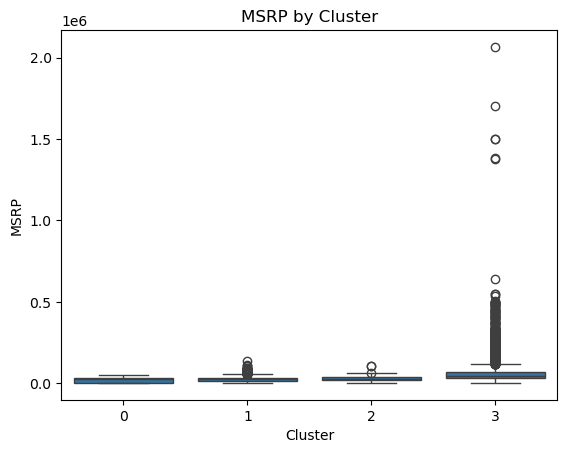

In [40]:
sns.boxplot(x='Cluster', y='MSRP', data=df)
plt.title('MSRP by Cluster')
plt.show()
